In [1]:
import tensorflow
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import *
from keras.layers.merge import *
import keras
from keras.optimizers import Adam
width = 512
height = 512


C:\Users\212718705\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


54
['IDRiD_01.jpg', 'IDRiD_02.jpg', 'IDRiD_03.jpg', 'IDRiD_04.jpg', 'IDRiD_05.jpg', 'IDRiD_06.jpg', 'IDRiD_07.jpg', 'IDRiD_08.jpg', 'IDRiD_09.jpg', 'IDRiD_10.jpg', 'IDRiD_11.jpg', 'IDRiD_12.jpg', 'IDRiD_13.jpg', 'IDRiD_14.jpg', 'IDRiD_15.jpg', 'IDRiD_16.jpg', 'IDRiD_17.jpg', 'IDRiD_18.jpg', 'IDRiD_19.jpg', 'IDRiD_20.jpg', 'IDRiD_21.jpg', 'IDRiD_22.jpg', 'IDRiD_23.jpg', 'IDRiD_24.jpg', 'IDRiD_25.jpg', 'IDRiD_26.jpg', 'IDRiD_27.jpg', 'IDRiD_28.jpg', 'IDRiD_29.jpg', 'IDRiD_30.jpg', 'IDRiD_31.jpg', 'IDRiD_32.jpg', 'IDRiD_33.jpg', 'IDRiD_34.jpg', 'IDRiD_35.jpg', 'IDRiD_36.jpg', 'IDRiD_37.jpg', 'IDRiD_38.jpg', 'IDRiD_39.jpg', 'IDRiD_40.jpg', 'IDRiD_41.jpg', 'IDRiD_42.jpg', 'IDRiD_43.jpg', 'IDRiD_44.jpg', 'IDRiD_45.jpg', 'IDRiD_46.jpg', 'IDRiD_47.jpg', 'IDRiD_48.jpg', 'IDRiD_49.jpg', 'IDRiD_50.jpg', 'IDRiD_51.jpg', 'IDRiD_52.jpg', 'IDRiD_53.jpg', 'IDRiD_54.jpg']
(54, 512, 512)
(54, 512, 512, 1)


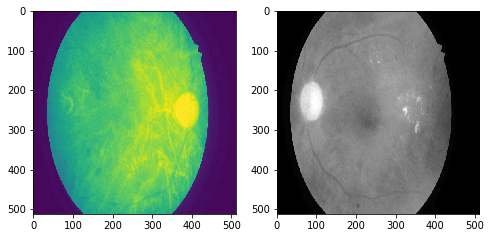

In [2]:
Training_input_data = 'C:/Ayush/image reconstruction/unet/OD seg/A. Segmentation/A. Segmentation/1. Original Images/a. Training Set/'
training_input_data = [x for x in sorted(os.listdir(Training_input_data))]
print(len(training_input_data))
print(training_input_data)
x_train_input_data = np.empty((len(training_input_data),width,height),dtype = 'float32')
for i,name  in enumerate(training_input_data):
    im = cv2.imread(Training_input_data + name,cv2.COLOR_BGR2GRAY).astype('int16').astype('float32')/255.
    im = im[:,:,2]
    im = cv2.resize(im,dsize = (width,height),interpolation = cv2.INTER_NEAREST)
    x_train_input_data[i] = im
    
print(x_train_input_data.shape)
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].imshow(x_train_input_data[0])
ax[1].imshow(x_train_input_data[1],cmap='gray')
x_train_input_data = x_train_input_data.reshape(x_train_input_data.shape[0],width,height,1)
print(x_train_input_data.shape)


27
['IDRiD_55.jpg', 'IDRiD_56.jpg', 'IDRiD_57.jpg', 'IDRiD_58.jpg', 'IDRiD_59.jpg', 'IDRiD_60.jpg', 'IDRiD_61.jpg', 'IDRiD_62.jpg', 'IDRiD_63.jpg', 'IDRiD_64.jpg', 'IDRiD_65.jpg', 'IDRiD_66.jpg', 'IDRiD_67.jpg', 'IDRiD_68.jpg', 'IDRiD_69.jpg', 'IDRiD_70.jpg', 'IDRiD_71.jpg', 'IDRiD_72.jpg', 'IDRiD_73.jpg', 'IDRiD_74.jpg', 'IDRiD_75.jpg', 'IDRiD_76.jpg', 'IDRiD_77.jpg', 'IDRiD_78.jpg', 'IDRiD_79.jpg', 'IDRiD_80.jpg', 'IDRiD_81.jpg']
(27, 512, 512)
(27, 512, 512, 1)
[[[0.00784314]
  [0.        ]
  [0.        ]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]

 [[0.00784314]
  [0.        ]
  [0.        ]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.00784314]
  [0.        ]
  [0.00784314]
  ...
  [0.00784314]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.00784314]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.

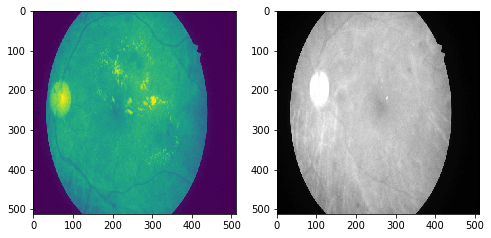

In [3]:
Testing_input_data = 'C:/Ayush/image reconstruction/unet/OD seg/A. Segmentation/A. Segmentation/1. Original Images/b. Testing Set/'
testing_input_data = [x for x in sorted(os.listdir(Testing_input_data))]
print(len(testing_input_data))
print(testing_input_data)
x_test_input_data = np.empty((len(testing_input_data),width,height),dtype = 'float32')
for i,name  in enumerate(testing_input_data):
    im = cv2.imread(Testing_input_data + name,cv2.COLOR_BGR2GRAY).astype('int16').astype('float32')/255.
    img = im[:,:,2]
    img = cv2.resize(img,dsize = (width,height),interpolation = cv2.INTER_NEAREST)
    x_test_input_data[i] = img
    
print(x_test_input_data.shape)
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].imshow(x_test_input_data[0])
ax[1].imshow(x_test_input_data[1],cmap = 'gray')
x_test_input_data = x_test_input_data.reshape(x_test_input_data.shape[0],width,height,1)
print(x_test_input_data.shape)
print(x_test_input_data[0])

54
['IDRiD_01_OD.tif', 'IDRiD_02_OD.tif', 'IDRiD_03_OD.tif', 'IDRiD_04_OD.tif', 'IDRiD_05_OD.tif', 'IDRiD_06_OD.tif', 'IDRiD_07_OD.tif', 'IDRiD_08_OD.tif', 'IDRiD_09_OD.tif', 'IDRiD_10_OD.tif', 'IDRiD_11_OD.tif', 'IDRiD_12_OD.tif', 'IDRiD_13_OD.tif', 'IDRiD_14_OD.tif', 'IDRiD_15_OD.tif', 'IDRiD_16_OD.tif', 'IDRiD_17_OD.tif', 'IDRiD_18_OD.tif', 'IDRiD_19_OD.tif', 'IDRiD_20_OD.tif', 'IDRiD_21_OD.tif', 'IDRiD_22_OD.tif', 'IDRiD_23_OD.tif', 'IDRiD_24_OD.tif', 'IDRiD_25_OD.tif', 'IDRiD_26_OD.tif', 'IDRiD_27_OD.tif', 'IDRiD_28_OD.tif', 'IDRiD_29_OD.tif', 'IDRiD_30_OD.tif', 'IDRiD_31_OD.tif', 'IDRiD_32_OD.tif', 'IDRiD_33_OD.tif', 'IDRiD_34_OD.tif', 'IDRiD_35_OD.tif', 'IDRiD_36_OD.tif', 'IDRiD_37_OD.tif', 'IDRiD_38_OD.tif', 'IDRiD_39_OD.tif', 'IDRiD_40_OD.tif', 'IDRiD_41_OD.tif', 'IDRiD_42_OD.tif', 'IDRiD_43_OD.tif', 'IDRiD_44_OD.tif', 'IDRiD_45_OD.tif', 'IDRiD_46_OD.tif', 'IDRiD_47_OD.tif', 'IDRiD_48_OD.tif', 'IDRiD_49_OD.tif', 'IDRiD_50_OD.tif', 'IDRiD_51_OD.tif', 'IDRiD_52_OD.tif', 'IDRiD_5

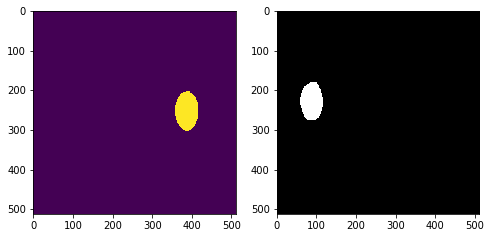

In [4]:
Training_output_data = 'C:/Ayush/image reconstruction/unet/OD seg/A. Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc/'
training_output_data = [x for x in sorted(os.listdir(Training_output_data))]
print(len(training_output_data))
print(training_output_data)
x_train_output_data = np.empty((len(training_output_data),width,height),dtype = 'float32')
for i,name  in enumerate(training_output_data):
    im = cv2.imread(Training_output_data + name).astype('int16').astype('float32')/255.
    img = im[:,:,2]
    img = cv2.resize(img,dsize = (width,height),interpolation = cv2.INTER_NEAREST)
    x_train_output_data[i] = img
    
print(x_train_output_data.shape)
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].imshow(x_train_output_data[0])
ax[1].imshow(x_train_output_data[1],cmap='gray')
x_train_output_data = x_train_output_data.reshape(x_train_output_data.shape[0],width,height,1)
print(x_train_output_data.shape)


27
['IDRiD_55_OD.tif', 'IDRiD_56_OD.tif', 'IDRiD_57_OD.tif', 'IDRiD_58_OD.tif', 'IDRiD_59_OD.tif', 'IDRiD_60_OD.tif', 'IDRiD_61_OD.tif', 'IDRiD_62_OD.tif', 'IDRiD_63_OD.tif', 'IDRiD_64_OD.tif', 'IDRiD_65_OD.tif', 'IDRiD_66_OD.tif', 'IDRiD_67_OD.tif', 'IDRiD_68_OD.tif', 'IDRiD_69_OD.tif', 'IDRiD_70_OD.tif', 'IDRiD_71_OD.tif', 'IDRiD_72_OD.tif', 'IDRiD_73_OD.tif', 'IDRiD_74_OD.tif', 'IDRiD_75_OD.tif', 'IDRiD_76_OD.tif', 'IDRiD_77_OD.tif', 'IDRiD_78_OD.tif', 'IDRiD_79_OD.tif', 'IDRiD_80_OD.tif', 'IDRiD_81_OD.tif']
(27, 512, 512)
(27, 512, 512, 1)


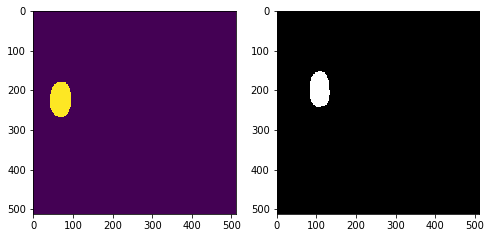

In [5]:
Testing_output_data = 'C:/Ayush/image reconstruction/unet/OD seg/A. Segmentation/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set/5. Optic Disc/'
testing_output_data = [x for x in sorted(os.listdir(Testing_output_data))]
print(len(testing_output_data))
print(testing_output_data)
x_test_output_data = np.empty((len(testing_output_data),width,height),dtype = 'float32')
for i,name  in enumerate(testing_output_data):
    im = cv2.imread(Testing_output_data + name).astype('int16').astype('float32')/255.
    img = im[:,:,2]
    img = cv2.resize(img,dsize = (width,height),interpolation = cv2.INTER_NEAREST)
    x_test_output_data[i] = img
    
print(x_test_output_data.shape)
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].imshow(x_test_output_data[0])
ax[1].imshow(x_test_output_data[1],cmap='gray')
x_test_output_data = x_test_output_data.reshape(x_test_output_data.shape[0],width,height,1)
print(x_test_output_data.shape)


In [6]:
inputs = Input( (width,height,1))
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(inputs)
conv1 = Dropout(0.5)(conv1)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(conv1)
conv2 = Dropout(0.3)(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
pool1 = Dropout(0.3)(pool1)
up1 = UpSampling2D(size = (2,2))(pool1)
conv3 = Conv2D(64,3,activation= 'relu',padding = 'same', kernel_initializer = 'he_uniform')(up1)
conv3 = Dropout(0.3)(conv3)
conv4 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(conv3)
conv4 = Dropout(0.3)(conv4)
conv5 = Conv2D(1, 1, activation = 'sigmoid')(conv4)
model1 = Model(input = inputs, output = conv5)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 32)      320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 512, 512, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 64)      18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512, 512, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256, 256, 64)      0         
__________

C:\Users\212718705\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  


In [7]:
model1.compile(optimizer = keras.optimizers.Nadam(), loss = 'binary_crossentropy',metrics=['accuracy'])
model1.fit(x_train_input_data,x_train_output_data,
          batch_size = 1,
          epochs = 10,
          verbose = 1,
          validation_data = (x_test_input_data,x_test_output_data))

Train on 54 samples, validate on 27 samples
Epoch 1/10
54/54 [==============================] - 344s 6s/step - loss: 0.1946 - acc: 0.9738 - val_loss: 0.2597 - val_acc: 0.9827
Epoch 2/10
54/54 [==============================] - 329s 6s/step - loss: 0.1226 - acc: 0.9819 - val_loss: 0.1653 - val_acc: 0.9827
Epoch 3/10
54/54 [==============================] - 306s 6s/step - loss: 0.0981 - acc: 0.9819 - val_loss: 0.1376 - val_acc: 0.9827
Epoch 4/10
54/54 [==============================] - 305s 6s/step - loss: 0.0739 - acc: 0.9820 - val_loss: 0.1766 - val_acc: 0.9827
Epoch 5/10
54/54 [==============================] - 448s 8s/step - loss: 0.0636 - acc: 0.9818 - val_loss: 0.1889 - val_acc: 0.9827
Epoch 6/10
54/54 [==============================] - 524s 10s/step - loss: 0.0524 - acc: 0.9820 - val_loss: 0.1555 - val_acc: 0.9827
Epoch 7/10
54/54 [==============================] - 530s 10s/step - loss: 0.0494 - acc: 0.9818 - val_loss: 0.0767 - val_acc: 0.9827
Epoch 8/10
54/54 [===================

In [ ]:
inputs = Input((width,height,1))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = merge([drop4,up6], mode = 'concat', concat_axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = merge([conv3,up7], mode = 'concat', concat_axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = merge([conv2,up8], mode = 'concat', concat_axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = merge([conv1,up9], mode = 'concat', concat_axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = Model(input = inputs, output = conv10)

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#model.summary()


In [12]:
from keras.utils import to_categorical
y_train_binary = to_categorical(x_train_output_data)

In [13]:
from keras.utils import to_categorical
y_test_binary = to_categorical(x_test_output_data)

In [31]:
model1.compile(optimizer = keras.optimizers.Nadam(), loss = 'binary_crossentropy',metrics=['accuracy'])
model1.fit(x_train_input_data,x_train_output_data,
          batch_size = 1,
          epochs = 10,
          verbose = 1,
          validation_data = (x_test_input_data,x_test_output_data))


Train on 54 samples, validate on 27 samples
Epoch 1/10
54/54 [==============================] - 324s 6s/step - loss: 0.0594 - acc: 0.9779 - val_loss: 0.0697 - val_acc: 0.9827
Epoch 2/10
54/54 [==============================] - 426s 8s/step - loss: 0.0497 - acc: 0.9819 - val_loss: 0.0347 - val_acc: 0.9827
Epoch 3/10
54/54 [==============================] - 552s 10s/step - loss: 0.0570 - acc: 0.9820 - val_loss: 0.0374 - val_acc: 0.9827
Epoch 4/10
54/54 [==============================] - 548s 10s/step - loss: 0.0429 - acc: 0.9816 - val_loss: 0.0380 - val_acc: 0.9829
Epoch 5/10
54/54 [==============================] - 550s 10s/step - loss: 0.0449 - acc: 0.9821 - val_loss: 0.0572 - val_acc: 0.9837
Epoch 6/10
54/54 [==============================] - 548s 10s/step - loss: 0.0501 - acc: 0.9835 - val_loss: 0.0378 - val_acc: 0.9827
Epoch 7/10
54/54 [==============================] - 553s 10s/step - loss: 0.0433 - acc: 0.9836 - val_loss: 0.0765 - val_acc: 0.9827
Epoch 8/10
54/54 [================

In [37]:
inputs = Input( (512,512,1))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(inputs)
#conv1 = Dropout(0.5)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
up1 = UpSampling2D(size = (2,2))(pool1)
conv2 = Conv2D(64,3,activation= 'relu',padding = 'same', kernel_initializer = 'he_uniform')(up1)
conv3 = Conv2D(1, 1, activation = 'sigmoid')(conv2)
model = Model(input = inputs, output = conv3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 512, 512, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 512, 512, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 512, 512, 64)      36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 512, 512, 1)       65        
Total params: 37,633
Trainable params: 37,633
Non-trainable params: 0
_________________________________________________________________


C:\Users\212718705\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  


In [38]:
model.compile(optimizer = keras.optimizers.Nadam(), loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
import time
t0 = time.time()

model.fit(x_train_input_data,x_train_output_data,
          batch_size = 1,
          epochs = 10,
          verbose = 1,
          validation_data = (x_test_input_data,x_test_output_data))
print ("training time:", round(time.time()-t0, 3), "s")

Train on 54 samples, validate on 27 samples
Epoch 1/10
54/54 [==============================] - 212s 4s/step - loss: 74.2205 - acc: 0.9799 - val_loss: 71.1597 - val_acc: 0.9827
Epoch 2/10
54/54 [==============================] - 211s 4s/step - loss: 74.2051 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 3/10
54/54 [==============================] - 224s 4s/step - loss: 74.2049 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 4/10
54/54 [==============================] - 203s 4s/step - loss: 74.2049 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 5/10
54/54 [==============================] - 175s 3s/step - loss: 74.2049 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 6/10
54/54 [==============================] - 164s 3s/step - loss: 74.2049 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 7/10
54/54 [==============================] - 164s 3s/step - loss: 74.2049 - acc: 0.9819 - val_loss: 71.1592 - val_acc: 0.9827
Epoch 8/10
54/54 [=======

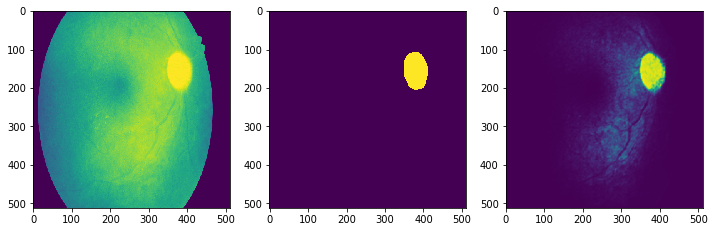

In [27]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(x_test_input_data[2,:,:,0])
ax[1].imshow(x_test_output_data[2,:,:,0])
ax[2].imshow(y_hat[2,:,:,0])